# **Problem Statement**
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

1 The company has to make a decision for loan approval based on the applicant’s profile.

2 Use EDA to understand how different attributes influence the tencency of default.

3 Willing to study the different aspects to mitigate the risk of default.

4 Use EDA techniques to augment the quality of available data by cleaning the date.


# **Aim of the analysis:**
Employ Exploratory Data Analysis(EDA) to discern the impact of borrower attributes and loan characteristics on default propensity.

# **Constraints:**
When an individualsubmits a loan, two potential outcomes arise:

Loan approval : Three possible scenarios may ensue:

** Fully paid:The borrower successfully repays the principal and interest.

**Current: The borrower is actively making payments.

**Charged-off:The borrower has defaulted on the loan, and the lender has writtenoff the outstanding balance.

Loan rejection: The application is denied, often due to insufficient credit history, inadequate income,or other eligibility criteria

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Reading the data from the given csv loan dataset

In [3]:
loan=pd.read_csv('loan.csv')
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
39712   36 months    8.07%        78.42     A        A4  ...   
39713   36 months   10.28%       275.38     C        C1  ...   
39714   36 months    8.07%       156.84     A        A4  ...   
39715   36 months    7.43%       155.38     A        A2  ...   
39716   36 months   13.75%       255.43     E        E2  ...   

      num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                    NaN                NaN            NaN               NaN   
1                    NaN                NaN            NaN               NaN   
2                    NaN                NaN            NaN               NaN   
3                    NaN                NaN            NaN               NaN   
4                    NaN                NaN            NaN               NaN   
...                  ...                ...            ...               ...   
39712                NaN                NaN            NaN               NaN   
39713                NaN                NaN            NaN               NaN   
39714                NaN                NaN            NaN               NaN   
39715                NaN                NaN            NaN               NaN   
39716                NaN                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                      0.0       0.0             NaN               NaN   
1                      0.0       0.0             NaN               NaN   
2                      0.0       0.0             NaN               NaN   
3                      0.0       0.0             NaN               NaN   
4                      0.0       0.0             NaN               NaN   
...                    ...       ...             ...               ...   
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
0                NaN                        NaN  
1                NaN                        NaN  
2                NaN                        NaN  
3                NaN                        NaN  
4                NaN                        NaN  
...              ...                        ...  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39

#Checking the shape of the given dataset

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#For simplicity checking the first 5 rows of the dataset and presence of headers or unwanted data

In [6]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

#Checking for unwanted footers

In [7]:
loan.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

In [8]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [9]:

#Finding the no of null values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
cols_null_percentage = round((loan.isnull().sum()/loan.shape[0])*100,2)
cols_null_percentage

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [11]:
cols_null_percentage_list = (cols_null_percentage[cols_null_percentage > 60]).index.tolist()

In [12]:
#Dropping all the cols with null percentage>60
loan = loan.drop(cols_null_percentage_list, axis = 1)

In [13]:
loan.shape

(39717, 54)

In [14]:
rows_null_percentage = round((loan.isnull().sum(axis=1)/loan.shape[1])*100,2)
rows_null_percentage.max()

11.11

In [15]:
rows_null_percentage[rows_null_percentage>10]

39714    11.11
39715    11.11
dtype: float64

In [16]:
loan[loan.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 54 columns]

In [17]:
unique_cols = loan.columns[loan.nunique() == 1].tolist()
unique_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [18]:
#unique_cols - contains list of the columns which have just 1 value
loan.drop(unique_cols, axis=1, inplace = True)

In [19]:
#checking again to see if any cols still have single unique value
loan.columns[loan.nunique() == 1]

Index([], dtype='object')

In [20]:
loan.shape

(39717, 45)

In [21]:
loan.drop(['id','member_id','loan_amnt','installment','funded_amnt_inv', 'url', 'desc', 'title','emp_title','delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies','zip_code' ], axis = 1, inplace = True)


In [22]:
loan.head()

funded_amnt        term int_rate grade sub_grade emp_length home_ownership  \
0         5000   36 months   10.65%     B        B2  10+ years           RENT   
1         2500   60 months   15.27%     C        C4   < 1 year           RENT   
2         2400   36 months   15.96%     C        C5  10+ years           RENT   
3        10000   36 months   13.49%     C        C1  10+ years           RENT   
4         3000   60 months   12.69%     B        B5     1 year           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
4     80000.0     Source Verified  Dec-11      Current           other   

  addr_state    dti  
0         AZ  27.65  
1         GA   1.00  
2         IL   8.72  
3         CA  20.00  
4         OR  17.94

In [23]:
loan.shape

(39717, 14)

In [24]:
#check the number of rows with status as current
loan[loan['loan_status']=='Current']

funded_amnt        term int_rate grade sub_grade emp_length  \
4             3000   60 months   12.69%     B        B5     1 year   
32           10000   60 months   15.96%     C        C5    2 years   
39           12500   60 months   12.69%     B        B5     1 year   
86           14000   60 months   17.27%     D        D3    4 years   
95           15300   60 months   22.06%     F        F4    6 years   
...            ...         ...      ...   ...       ...        ...   
15972        10400   60 months    6.00%     E        E3    5 years   
15981         6000   60 months   10.37%     B        B3     1 year   
16361        19200   60 months   10.74%     B        B4    5 years   
16609         9350   60 months   10.00%     B        B2    8 years   
18215         9000   60 months   13.06%     C        C2    4 years   

      home_ownership  annual_inc verification_status issue_d loan_status  \
4               RENT     80000.0     Source Verified  Dec-11     Current   
32              RENT     29120.0            Verified  Dec-11     Current   
39              RENT     27000.0            Verified  Dec-11     Current   
86              RENT     28000.0            Verified  Dec-11     Current   
95              RENT     85000.0            Verified  Dec-11     Current   
...              ...         ...                 ...     ...         ...   
15972       MORTGAGE     29000.0     Source Verified  May-11     Current   
15981           RENT     24000.0     Source Verified  Apr-11     Current   
16361       MORTGAGE    100000.0            Verified  Apr-11     Current   
16609           RENT     66000.0        Not Verified  Apr-11     Current   
18215           RENT     44137.0        Not Verified  Mar-11     Current   

                  purpose addr_state    dti  
4                   other         OR  17.94  
32     debt_consolidation         FL  22.83  
39     debt_consolidation         IL  16.04  
86                  other         WA   6.34  
95            credit_card         VA  20.58  
...                   ...        ...    ...  
15972         credit_card         TX  10.84  
15981                 car         NY  11.05  
16361      small_business         NJ   4.43  
16609                 car         NY   4.84  
18215  debt_consolidation         CA   5.74  

[1140 rows x 14 columns]

In [25]:
#removing these rows
loan = loan[~(loan['loan_status']=='Current')]

In [26]:
#verifying the shape of dataframe loan
loan.shape

(38577, 14)

In [27]:
loan.dtypes

funded_amnt              int64
term                    object
int_rate                object
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [28]:
#Changing the column int_rate to int type from object type
loan['int_rate'] = loan['int_rate'].apply(lambda x: x[:-1])
loan['int_rate'] = loan['int_rate'].astype('float32')

In [29]:
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float32

In [30]:
#Recheck the datatype
loan.dtypes

funded_amnt              int64
term                    object
int_rate               float32
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [31]:
loan['issue_d']=pd.to_datetime(loan['issue_d'], format='%b-%y')
#Deriving month and year columns from issue_d
loan['issue_mon']=pd.DatetimeIndex(loan['issue_d']).month
loan['issue_yrs']=pd.DatetimeIndex(loan['issue_d']).year
#To prevent data misleading, as day of the month will only be 1
loan['issue_d'] = pd.to_datetime(loan['issue_d']).dt.strftime('%Y-%m')

In [32]:
loan

funded_amnt        term  int_rate grade sub_grade emp_length  \
0             5000   36 months     10.65     B        B2  10+ years   
1             2500   60 months     15.27     C        C4   < 1 year   
2             2400   36 months     15.96     C        C5  10+ years   
3            10000   36 months     13.49     C        C1  10+ years   
5             5000   36 months      7.90     A        A4    3 years   
...            ...         ...       ...   ...       ...        ...   
39712         2500   36 months      8.07     A        A4    4 years   
39713         8500   36 months     10.28     C        C1    3 years   
39714         5000   36 months      8.07     A        A4   < 1 year   
39715         5000   36 months      7.43     A        A2   < 1 year   
39716         7500   36 months     13.75     E        E2   < 1 year   

      home_ownership  annual_inc verification_status  issue_d  loan_status  \
0               RENT     24000.0            Verified  2011-12   Fully Paid   
1               RENT     30000.0     Source Verified  2011-12  Charged Off   
2               RENT     12252.0        Not Verified  2011-12   Fully Paid   
3               RENT     49200.0     Source Verified  2011-12   Fully Paid   
5               RENT     36000.0     Source Verified  2011-12   Fully Paid   
...              ...         ...                 ...      ...          ...   
39712       MORTGAGE    110000.0        Not Verified  2007-07   Fully Paid   
39713           RENT     18000.0        Not Verified  2007-07   Fully Paid   
39714       MORTGAGE    100000.0        Not Verified  2007-07   Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  2007-07   Fully Paid   
39716            OWN     22000.0        Not Verified  2007-06   Fully Paid   

                  purpose addr_state    dti  issue_mon  issue_yrs  
0             credit_card         AZ  27.65         12       2011  
1                     car         GA   1.00         12       2011  
2          small_business         IL   8.72         12       2011  
3                   other         CA  20.00         12       2011  
5                 wedding         AZ  11.20         12       2011  
...                   ...        ...    ...        ...        ...  
39712    home_improvement         CO  11.33          7       2007  
39713         credit_card         NC   6.40          7       2007  
39714  debt_consolidation         MA   2.30          7       2007  
39715               other         MD   3.72          7       2007  
39716  debt_consolidation         MA  14.29          6       2007  

[38577 rows x 16 columns]

In [33]:
#Check if any values are missing for any records
loan.isnull().sum()

funded_amnt               0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
issue_mon                 0
issue_yrs                 0
dtype: int64

In [34]:
#We see that 1033 records are missing employee length
loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [35]:
#Removing the records with null values for emp_length, to prevent assuming and  skewing the chart more towards the 10+ years
#without having enough correct information
loan = loan.dropna(subset=['emp_length'])

In [36]:
#Final check for nulls, data shape, data type of all columns used
loan.isnull().sum()

funded_amnt            0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
issue_mon              0
issue_yrs              0
dtype: int64

In [37]:
loan.shape

(37544, 16)

In [38]:
loan.dtypes

funded_amnt              int64
term                    object
int_rate               float32
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
issue_mon                int32
issue_yrs                int32
dtype: object

In [39]:
#Check all columns to see all are in the range expected and dont have unexpected values.
loan['funded_amnt'].value_counts()
loan['funded_amnt'].describe()

count    37544.000000
mean     10853.560489
std       7096.316776
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [40]:
loan['term'].value_counts()
loan['term'].describe()

count          37544
unique             2
top        36 months
freq           28287
Name: term, dtype: object

In [41]:
loan['int_rate'].value_counts()
loan['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683000
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [42]:
loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [45]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

In [43]:
loan['sub_grade'].value_counts()

sub_grade
A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [44]:
loan['grade'].value_counts()

grade
B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: count, dtype: int64

In [46]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16278
Verified           11772
Source Verified     9494
Name: count, dtype: int64

In [48]:
#Adding derived column annual_inc_bracket, which creates buckets for annual_income to facilitate analysis
def annual_inc_bracket(column):
    if column <=30000:
        return '4K - 30K'
    elif (column >30000) and (column <=40000):
        return '30K - 40K'
    elif (column >40000) and (column <=50000):
        return '40K - 50K'
    elif (column >50000) and (column <=60000):
        return '50K - 60K'
    elif (column >60000) and (column <=70000):
        return '60K - 70K'
    elif (column >70000) and (column <=80000):
        return '70K - 80K'
    elif (column >80000) and (column <=100000):
        return '80K - 100K'
    elif (column >100000) and (column <=200000):
        return '100K - 200K'
    else:
        return '200K+'
loan['annual_inc_bracket']=loan.apply(lambda x:annual_inc_bracket(x['annual_inc']),axis=1)

In [49]:
#Adding derived column annual_inc_bracket, which creates buckets for annual_income to facilitate analysis
def dti_bracket(column):
    if column <=5:
        return '0-5'
    elif (column >5) and (column <=10):
        return '5-10'
    elif (column >10) and (column <=15):
        return '10-15'
    elif (column >15) and (column <=20):
        return '15-20'
    elif (column >20) and (column <=25):
        return '20-25'
    else:
        return '25-30'
loan['dti_bracket']=loan.apply(lambda x:dti_bracket(x['dti']),axis=1)

In [50]:
def funded_amnt_bracket(column):
    if column <=5000:
        return '0-5K'
    elif (column >5000) and (column <=10000):
        return '5K-10K'
    elif (column >10000) and (column <=15000):
        return '10K-15K'
    elif (column >15000) and (column <=20000):
        return '15K-20K'
    elif (column >20000) and (column <=25000):
        return '20K-25K'
    elif (column >25000) and (column <=30000):
        return '25K-30K'
    else:
        return '30K-35K'
loan['funded_amnt_bracket']=loan.apply(lambda x:funded_amnt_bracket(x['funded_amnt']),axis=1)

In [51]:
def int_rate_bracket(column):
    if column <=10:
        return '5-10%'
    elif (column >10) and (column <=15):
        return '10-15%'
    elif (column >15) and (column <=20):
        return '15-20%'
    else:
        return '20-25%'
loan['int_rate_bracket']=loan.apply(lambda x:int_rate_bracket(x['int_rate']),axis=1)

In [52]:
loan['annual_inc_bracket'].value_counts()

annual_inc_bracket
40K - 50K      5539
50K - 60K      5462
30K - 40K      4956
100K - 200K    4871
80K - 100K     4466
4K - 30K       4183
60K - 70K      4026
70K - 80K      3479
200K+           562
Name: count, dtype: int64

In [53]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16278
Verified           11772
Source Verified     9494
Name: count, dtype: int64

In [54]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

In [55]:
loan['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [56]:
loan['addr_state'].value_counts()

addr_state
CA    6768
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1340
GA    1319
MA    1268
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [57]:
loan['dti'].value_counts()

dti
0.00     168
18.00     44
12.00     44
19.20     39
13.20     38
        ... 
29.78      1
25.73      1
29.48      1
25.60      1
25.43      1
Name: count, Length: 2848, dtype: int64

In [58]:
loan['issue_mon'].value_counts()

issue_mon
12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: count, dtype: int64

In [59]:
loan['issue_yrs'].value_counts()

issue_yrs
2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

#Treating outliers to clean the loan dataset

#This code is used to create a box plot for the funded amounts to visually identify any outliers in that data.

Text(0.5, 0, 'Funded Amount')

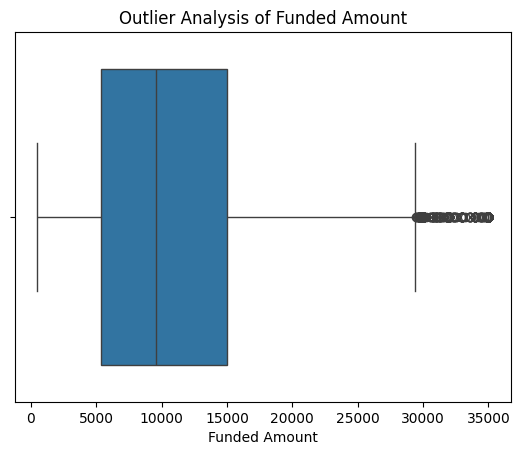

In [62]:
#Using box plots for continuous data to check for outliers in funded amount
sns.boxplot(x=loan['funded_amnt'])
plt.title('Outlier Analysis of Funded Amount')
plt.xlabel('Funded Amount')

#This code is aimed at visually inspecting the annual income variable to detect any statistical outliers, which are values that lie significantly outside the expected range.

Text(0.5, 0, 'Annual Income')

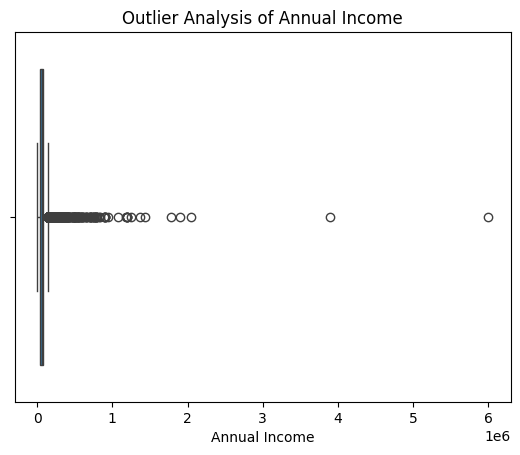

In [63]:
#Using box plots for continuous data to check for outliers in annual income
sns.boxplot(x=loan['annual_inc'])
plt.title('Outlier Analysis of Annual Income')
plt.xlabel('Annual Income')

#This code snippet is intended to visualize the variation and outliers in the interest rates of loans.

Text(0.5, 0, 'Interest Rate')

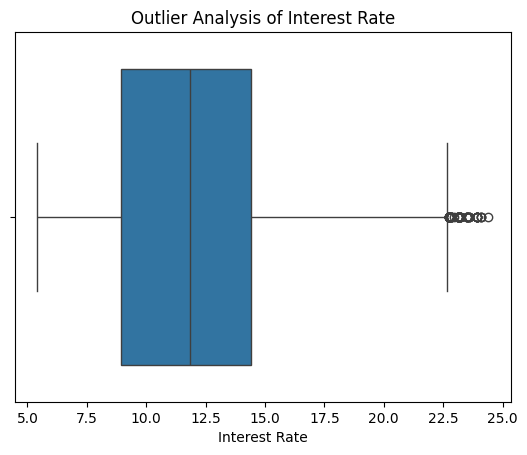

In [64]:
#Using box plots for continuous data to check for outliers in interest rate
sns.boxplot(x=loan['int_rate'])
plt.title('Outlier Analysis of Interest Rate')
plt.xlabel('Interest Rate')

#This code visualizes how annual income varies across different loan statuses using a box plot, providing insights into the distribution of annual income for each status.

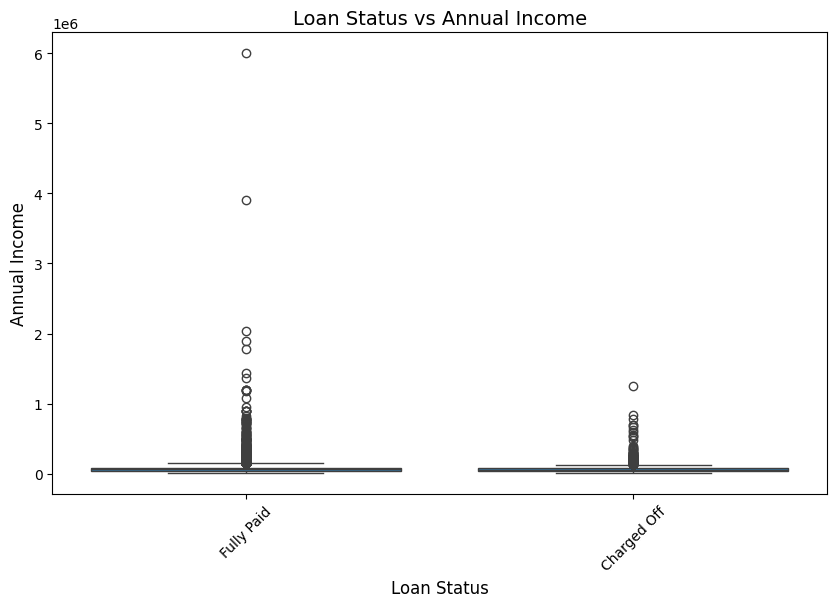

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan, x='loan_status', y='annual_inc')
plt.title("Loan Status vs Annual Income", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#We can consider any value of annual income above 150000 as an outlier because we dont have any defaulters with income>150000

In [66]:
#Removing the outliers
loan=loan[loan['annual_inc']<=150000]

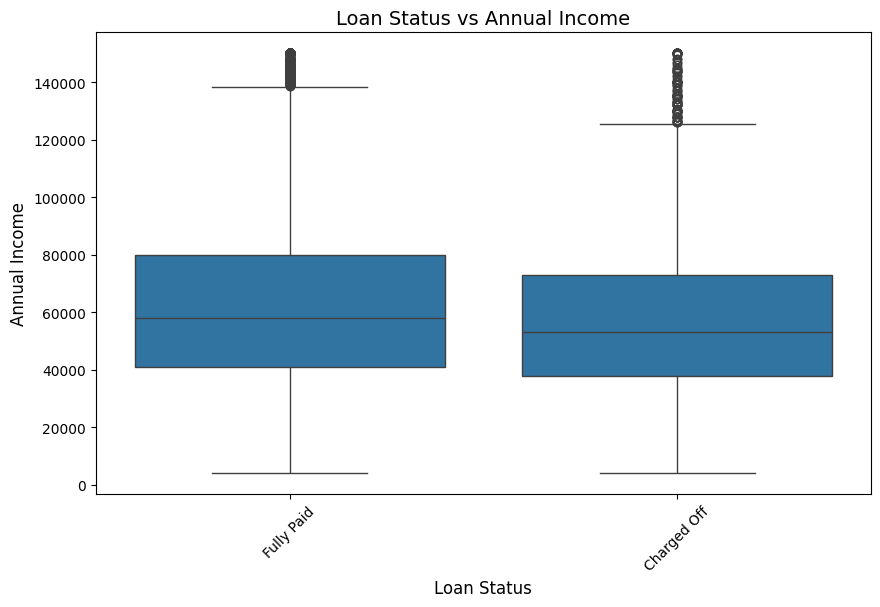

In [67]:
#Box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan, x='loan_status', y='annual_inc')
plt.title("Loan Status vs Annual Income", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Debt_to_Income Ratio')

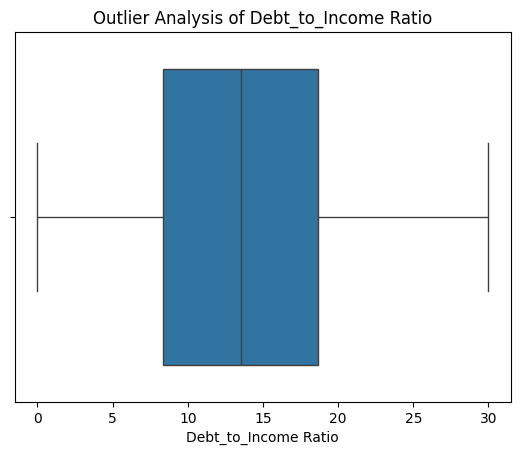

In [68]:
#Using box plots for continuous data to check for outliers in annual income
sns.boxplot(x=loan['dti'])
plt.title('Outlier Analysis of Debt_to_Income Ratio')
plt.xlabel('Debt_to_Income Ratio')

# **UNIVARIATE ANALYSIS**

Text(0, 0.5, 'Frequency')

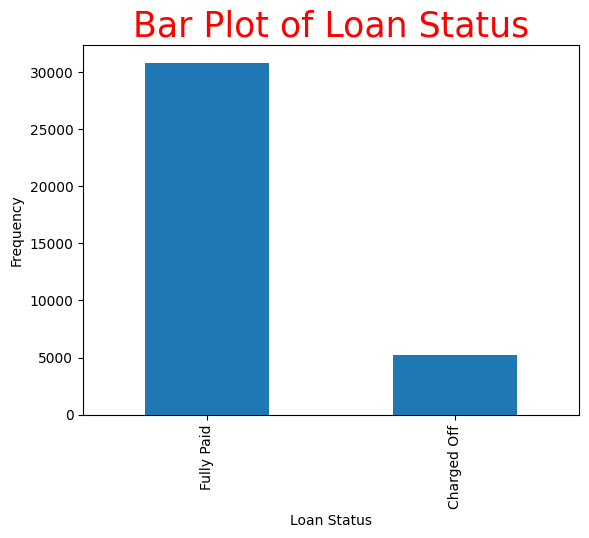

In [69]:
#univariate analysis of Loan Status
loan['loan_status'].value_counts().plot.bar()
plt.title('Bar Plot of Loan Status', color='red', size=25)
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

In [70]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     30835
Charged Off     5239
Name: count, dtype: int64

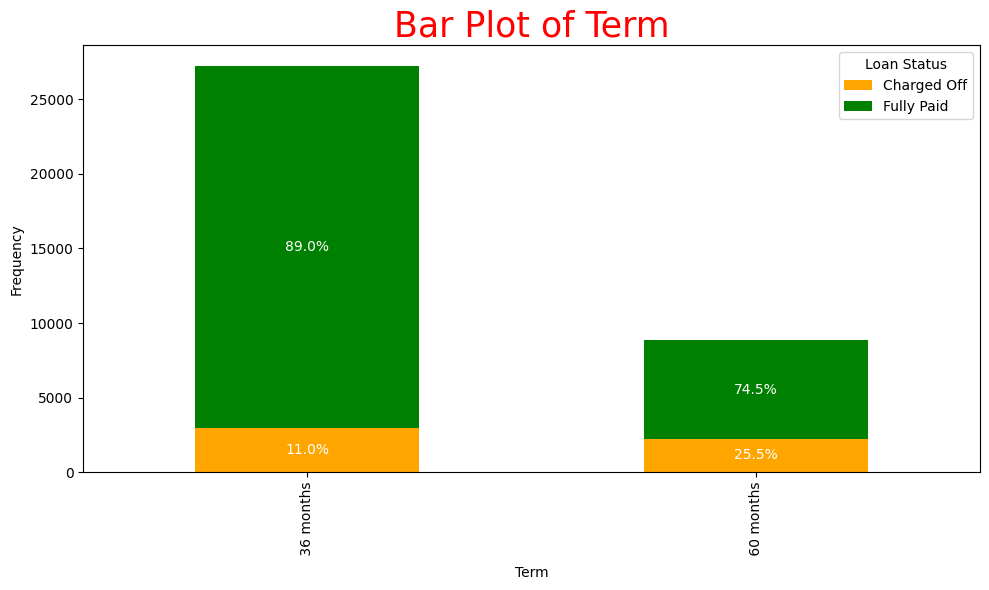

In [71]:
#univariate analysis of term
grouped = loan.groupby(['term', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Term', color='red', size=25)
plt.xlabel('Term')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, term in enumerate(grouped.index):
    total = grouped.loc[term].sum()  # Total for this term
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[term, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

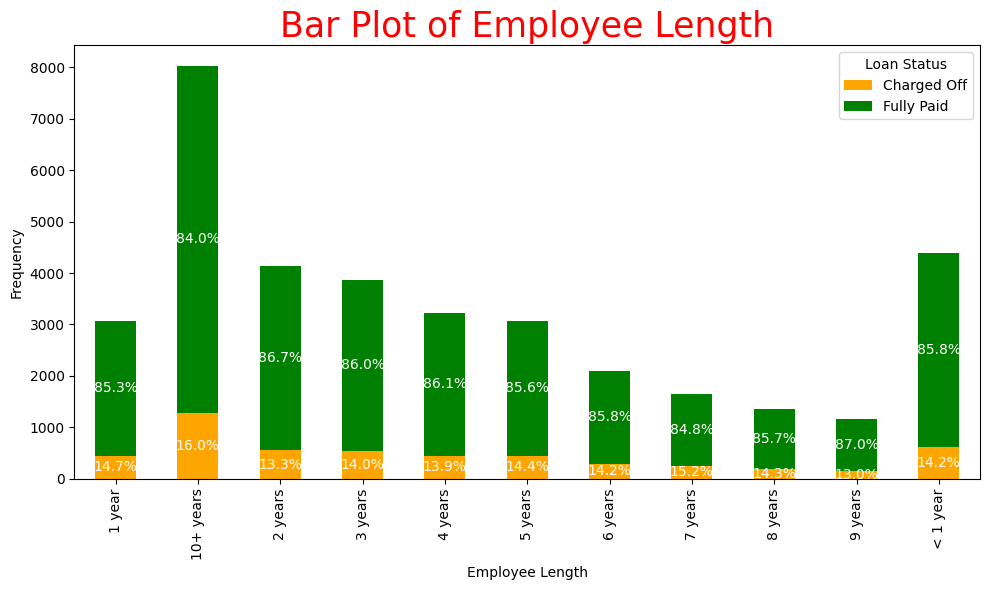

In [72]:
#univariate analysis of emp_length
grouped = loan.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Employee Length', color='red', size=25)
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
#univariate analysis of

# Add percentage annotations on each stack
for i, emp_length in enumerate(grouped.index):
    total = grouped.loc[emp_length].sum()  # Total for this emp_length
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[emp_length, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


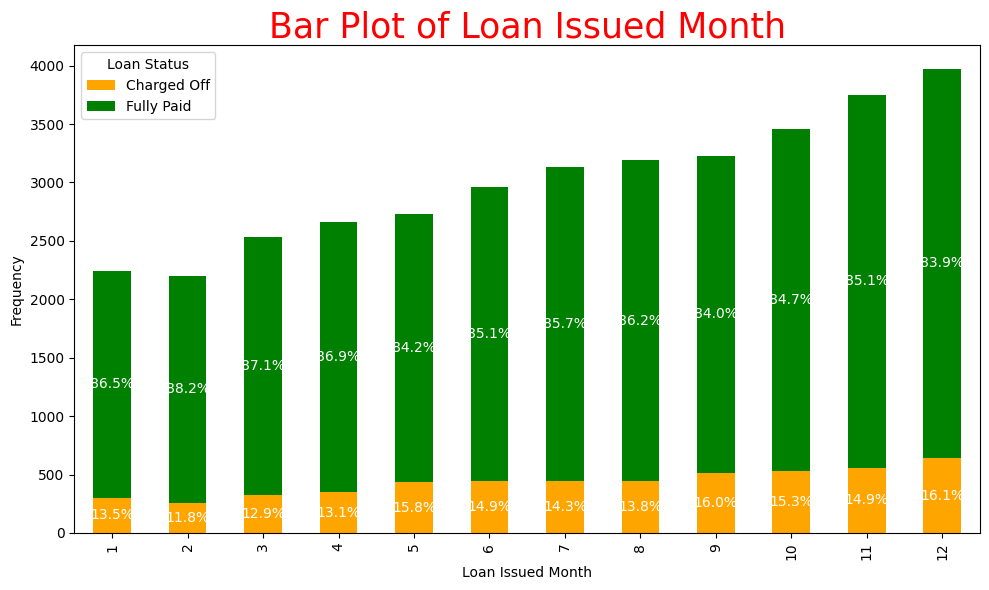

In [73]:
grouped = loan.groupby(['issue_mon', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Loan Issued Month', color='red', size=25)
plt.xlabel('Loan Issued Month')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, issue_mon in enumerate(grouped.index):
    total = grouped.loc[issue_mon].sum()  # Total for this issue_mon
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[issue_mon, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

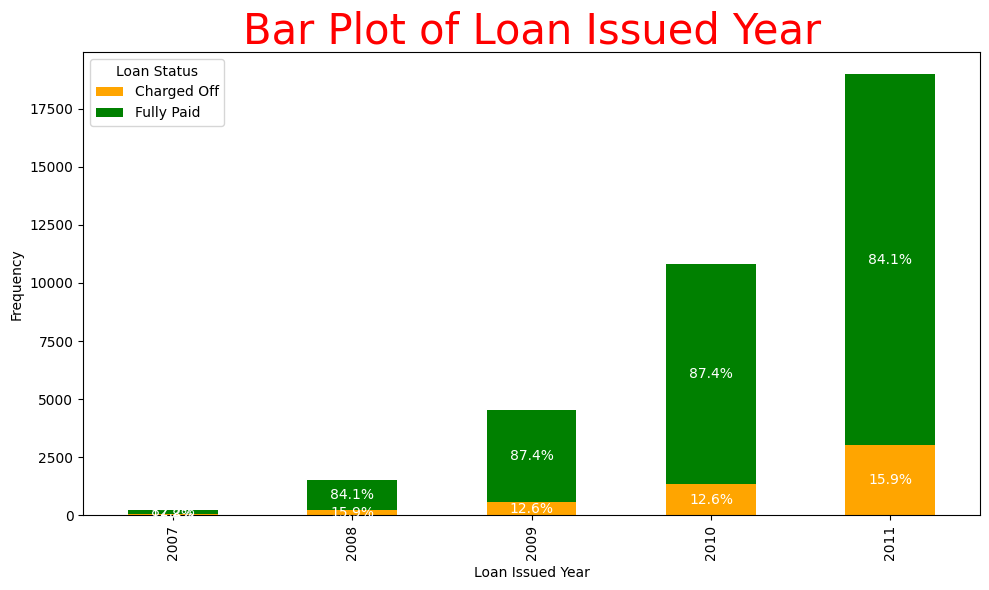

In [76]:
grouped = loan.groupby(['issue_yrs', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Loan Issued Year', color='red', size=30)
plt.xlabel('Loan Issued Year')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, issue_yrs in enumerate(grouped.index):
    total = grouped.loc[issue_yrs].sum()  # Total for this issue_yrs
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[issue_yrs, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

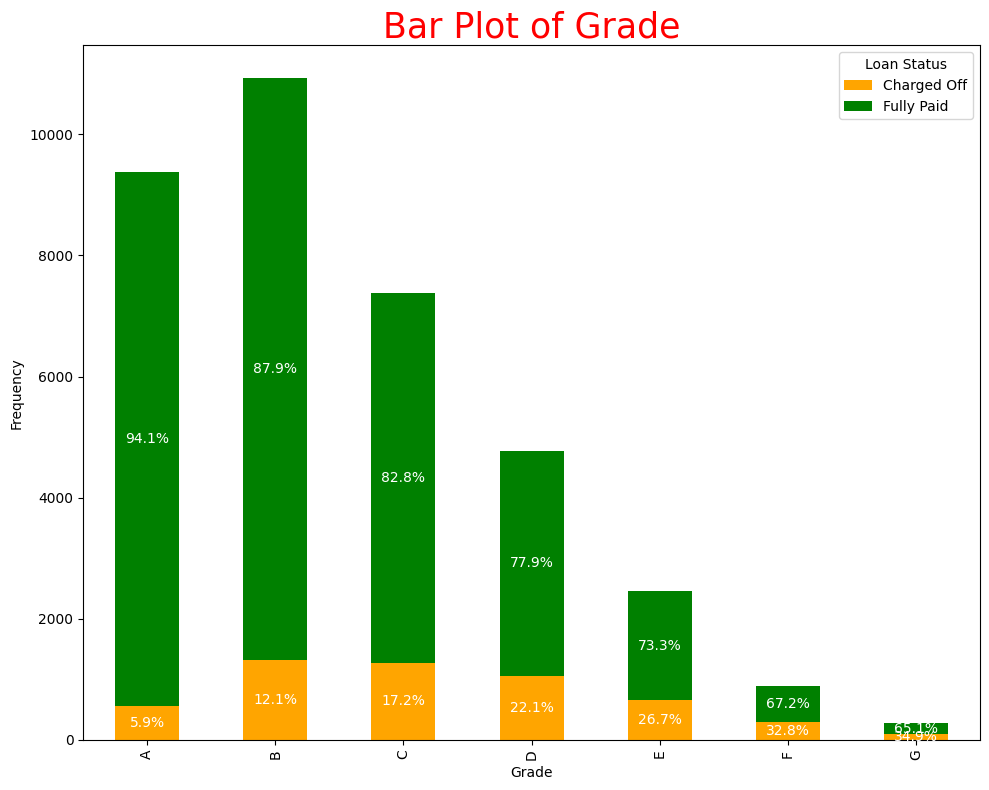

In [78]:
grouped = loan.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 8), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Grade', color='red', size=25)
plt.xlabel('Grade')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, grade in enumerate(grouped.index):
    total = grouped.loc[grade].sum()  # Total for grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[grade, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

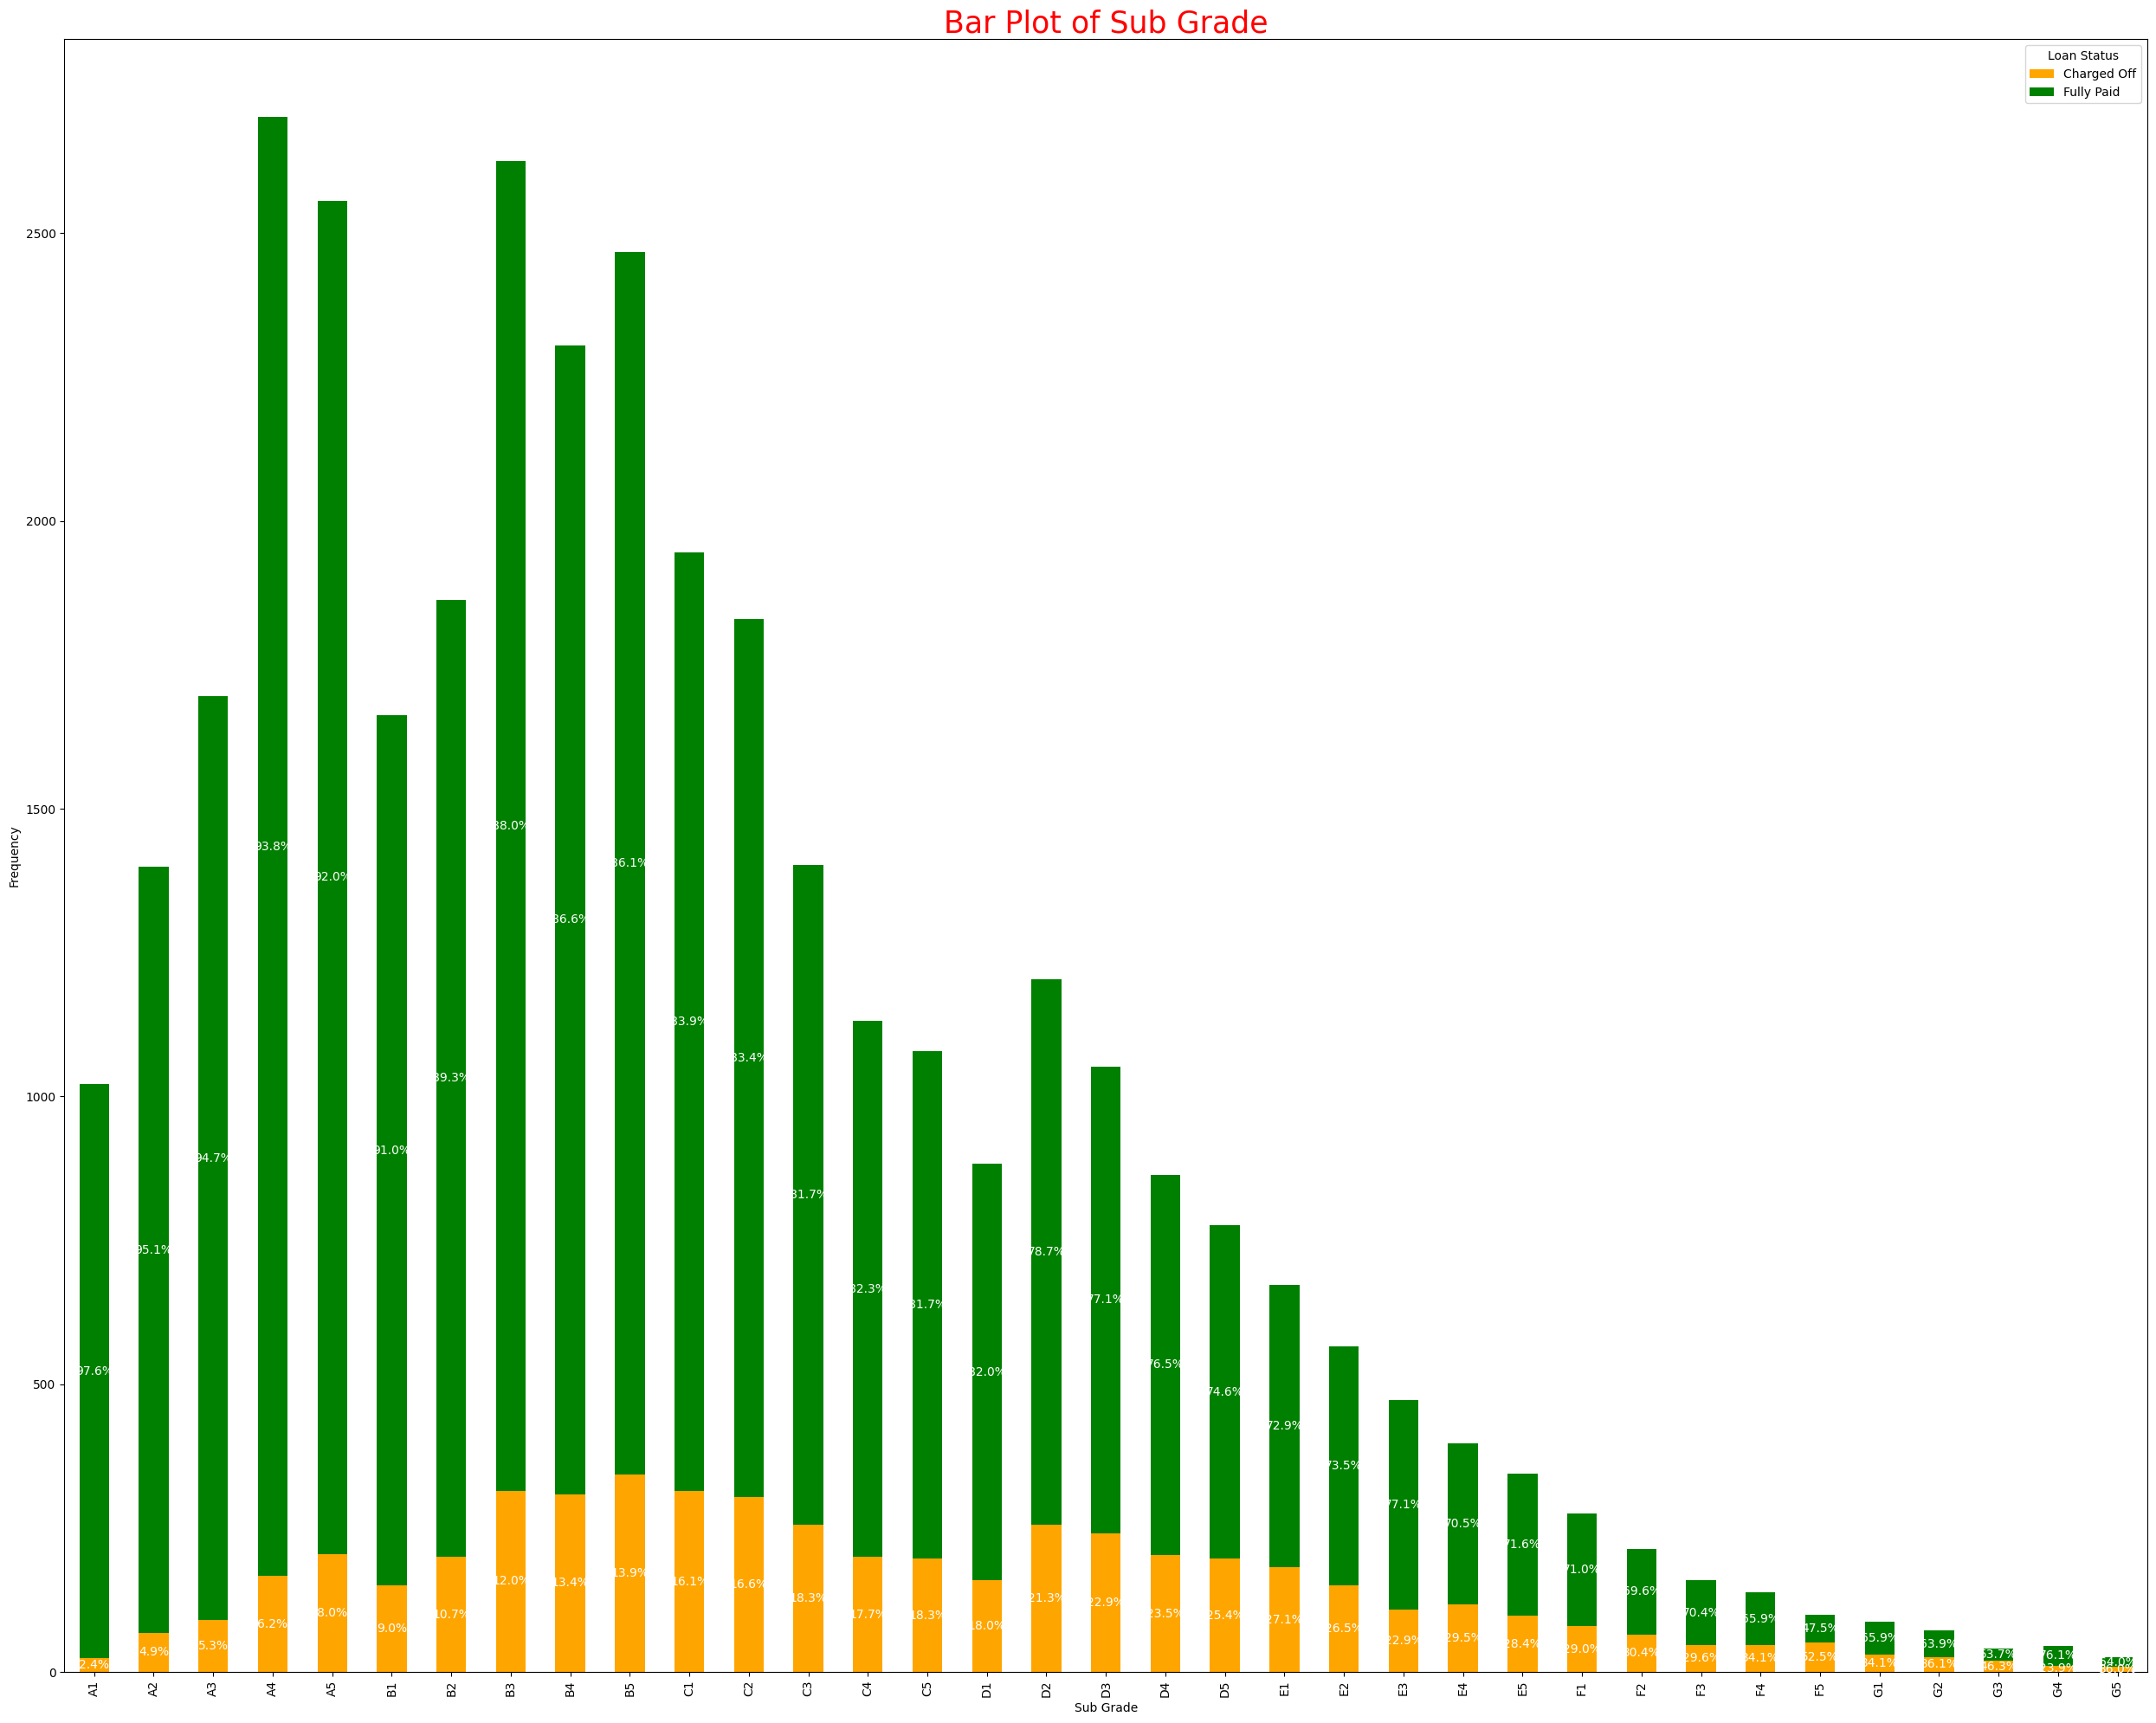

In [79]:
grouped = loan.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 20), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Sub Grade', color='red', size=25)
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, sub_grade in enumerate(grouped.index):
    total = grouped.loc[sub_grade].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[sub_grade, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

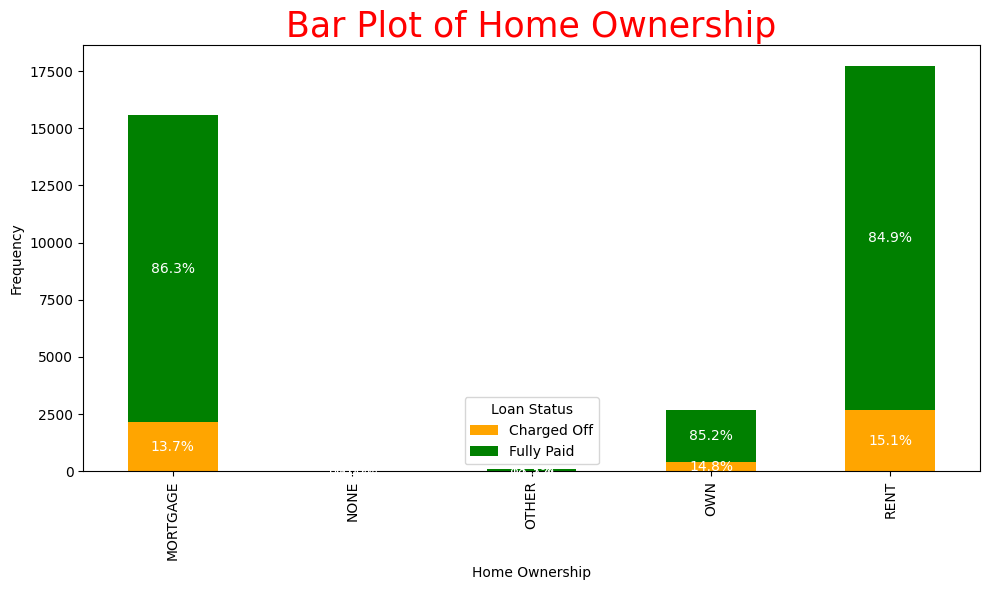

In [80]:
grouped = loan.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Home Ownership', color='red', size=25)
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, home_ownership in enumerate(grouped.index):
    total = grouped.loc[home_ownership].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[home_ownership, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


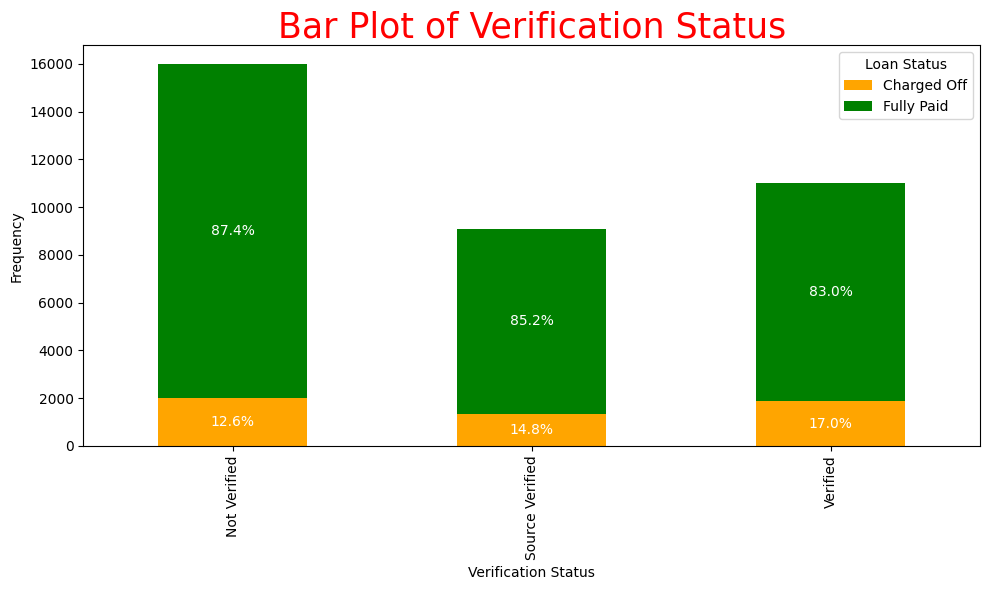

In [81]:
grouped = loan.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Verification Status', color='red', size=25)
plt.xlabel('Verification Status')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, verification_status in enumerate(grouped.index):
    total = grouped.loc[verification_status].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[verification_status, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [82]:
#Merging Source verified and Verified as the difference in percentage is very less.
loan['verification_status'].replace('Source Verified','Verified', inplace=True)

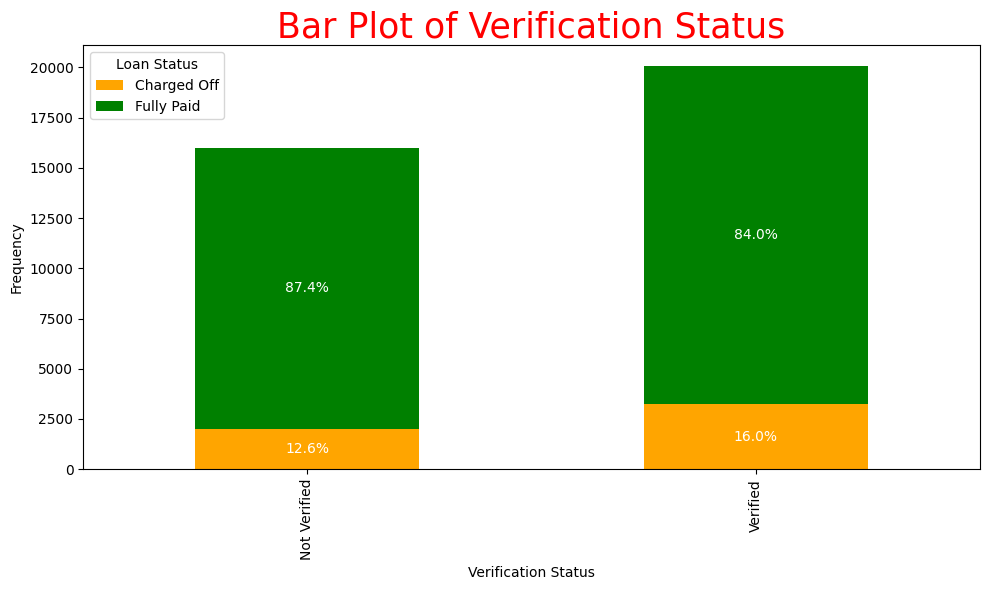

In [83]:
grouped = loan.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Verification Status', color='red', size=25)
plt.xlabel('Verification Status')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, verification_status in enumerate(grouped.index):
    total = grouped.loc[verification_status].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[verification_status, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

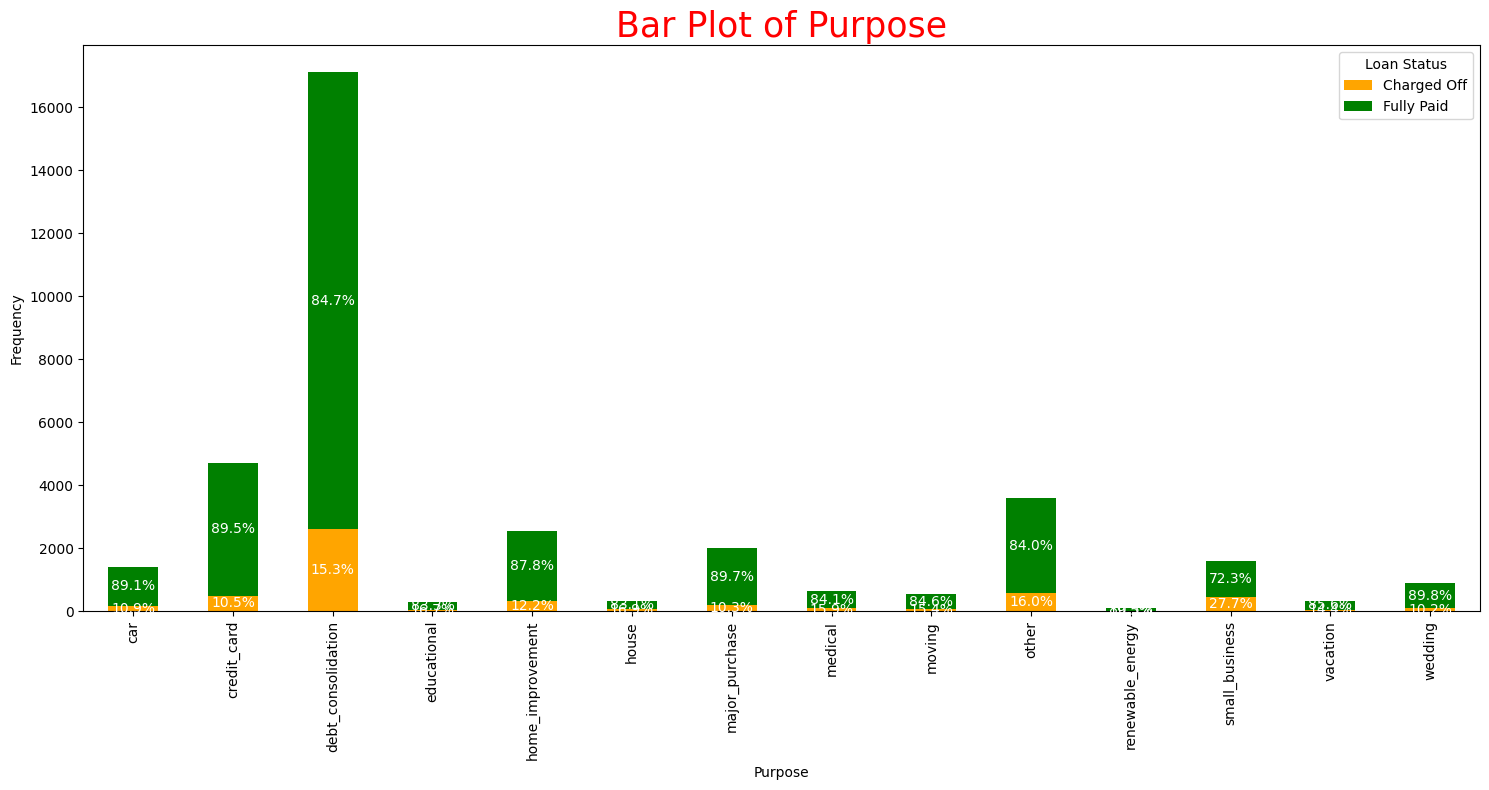

In [84]:
grouped = loan.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(15, 8), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Purpose', color='red', size=25)
plt.xlabel('Purpose')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, purpose in enumerate(grouped.index):
    total = grouped.loc[purpose].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[purpose, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

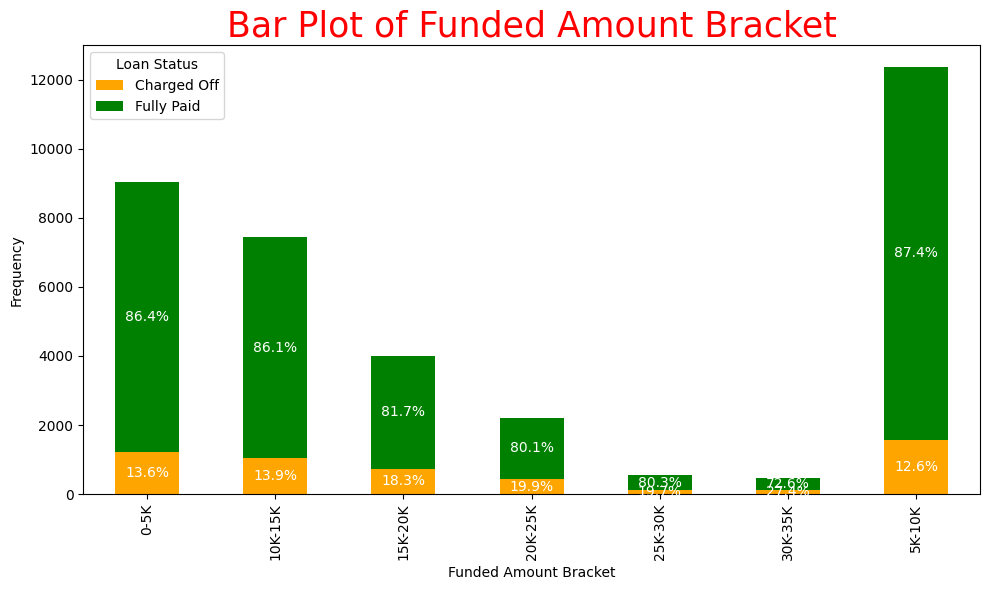

In [85]:
grouped = loan.groupby(['funded_amnt_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Funded Amount Bracket', color='red', size=25)
plt.xlabel('Funded Amount Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, funded_amnt_bracket in enumerate(grouped.index):
    total = grouped.loc[funded_amnt_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[funded_amnt_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

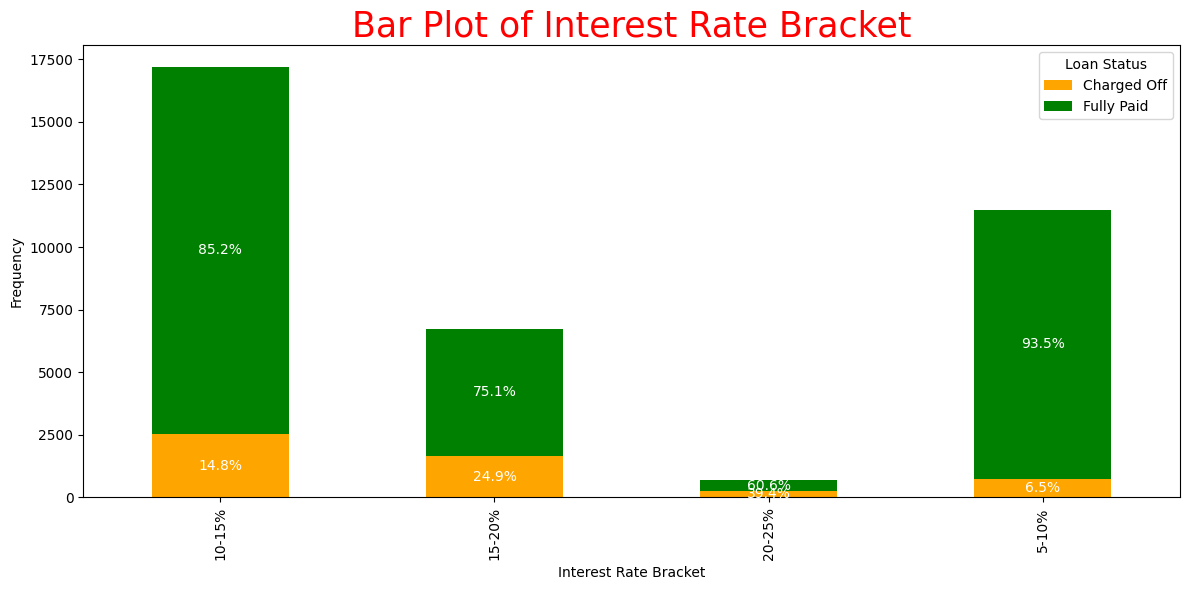

In [86]:
grouped = loan.groupby(['int_rate_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Interest Rate Bracket', color='red', size=25)
plt.xlabel('Interest Rate Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, int_rate_bracket in enumerate(grouped.index):
    total = grouped.loc[int_rate_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[int_rate_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

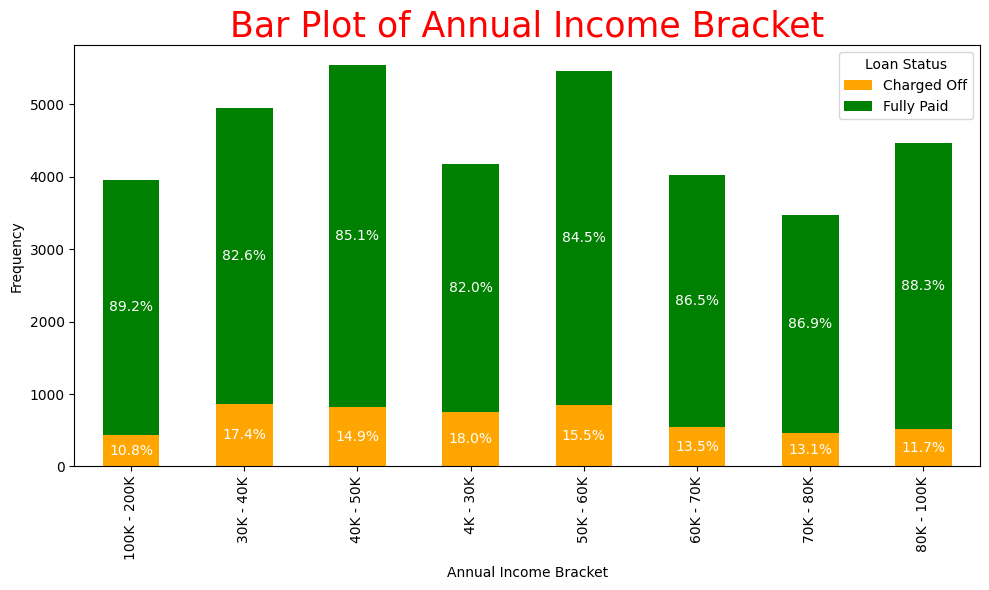

In [87]:
grouped = loan.groupby(['annual_inc_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Annual Income Bracket', color='red', size=25)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, annual_inc_bracket in enumerate(grouped.index):
    total = grouped.loc[annual_inc_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[annual_inc_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

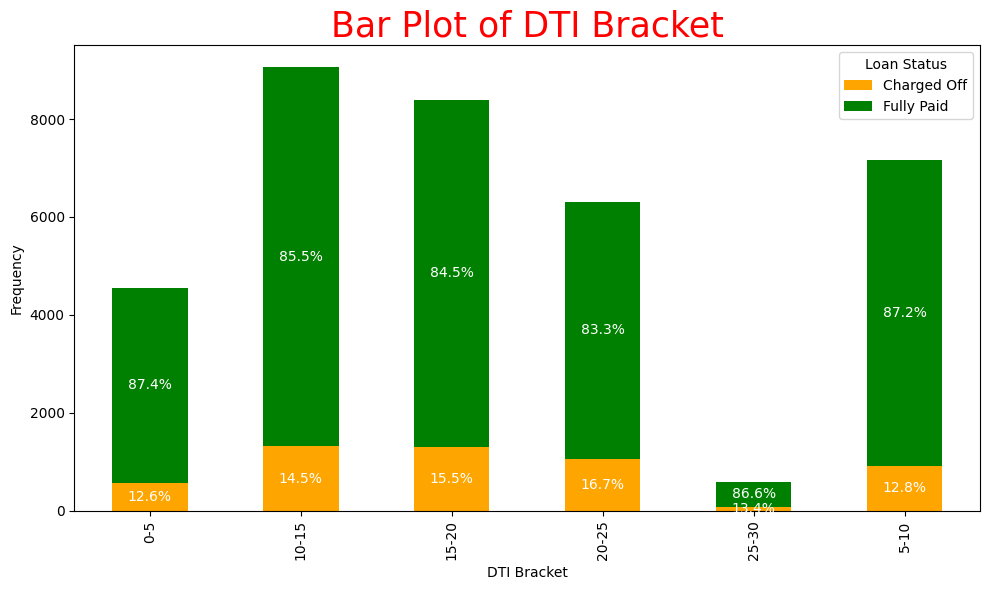

In [88]:
grouped = loan.groupby(['dti_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of DTI Bracket', color='red', size=25)
plt.xlabel('DTI Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, dti_bracket in enumerate(grouped.index):
    total = grouped.loc[dti_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[dti_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#Observations of univariate analysis

47% of total applicants fully pay off the loan and 14.53% dont. We should aim to loan to people having similar characteristics as the 85.47% to avoid being at financial loss.

Few driving variables which will help in this decision are :

Term - Applicants charge off more as the term increases - Lend Money to applicants at short terms,
here:36 months to avoid financial loss
Loan Issued month - Applicants taking loan in November or December default the highest. The reason for this could be Holiday(Black Friday, Christmas) season.

 It is recommended to lend money in the initial month's of the years (January-April)
Grade -
Lend Money to people who are in LC Grade A and B to avoid business loss
Lend Money to applicants who are in LC Grade C and D with shorter term - 36months to reduce defaulters as per our earlier analysis.

Reject applicants whose LC Grade are E,F and G
Purpose - Applicants taking loan for small_business and renewable energy default the most.
Funded Amount - The funded amount is directionally proportional to applicants being Charged OFF.

Interest Rate - The interest rate is directionally proportional to applicants being Charged OFF

Annual Income - The applicant's annual income is inversely proportional to being Charged OFF

# **BIVARIATE ANALYSIS**

#Checking the relation of Funded Amount with other attributes

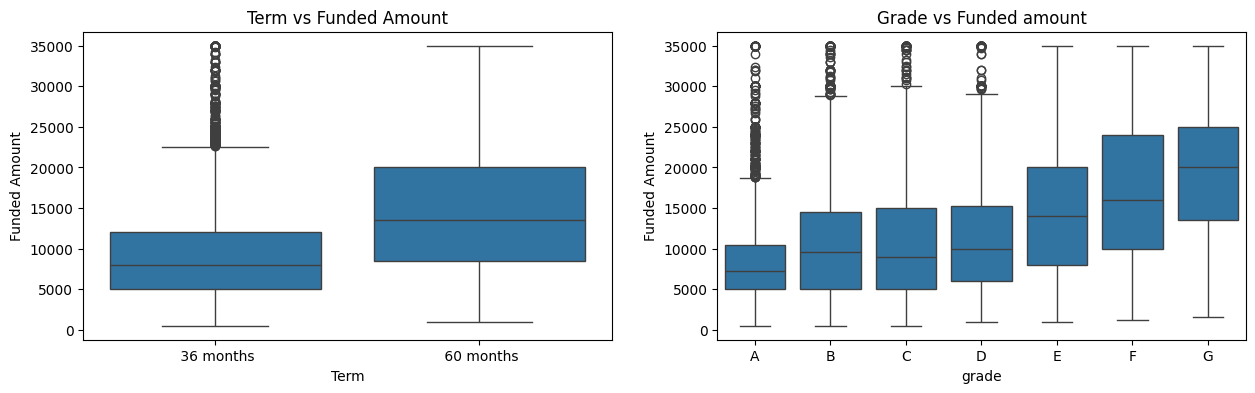

In [89]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="funded_amnt", data=loan)
plt.title("Term vs Funded Amount")
plt.xlabel('Term')
plt.ylabel('Funded Amount')
plt.subplot(1,2,2)
sns.boxplot(x="grade", y="funded_amnt", data=loan, order=['A','B','C','D','E','F','G'])
plt.title("Grade vs Funded amount")
plt.xlabel('grade')
plt.ylabel('Funded Amount')
plt.show()

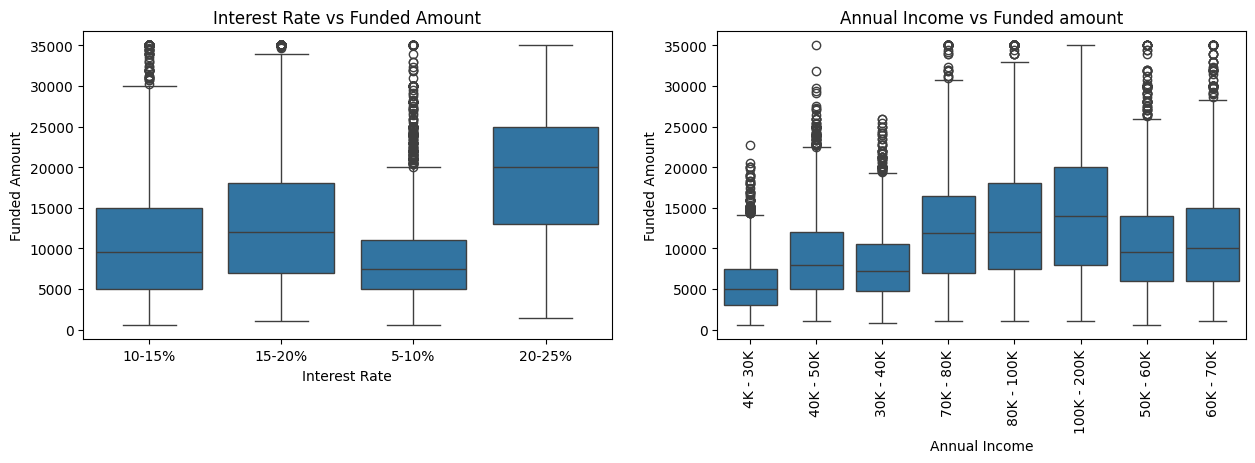

In [90]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="int_rate_bracket", y="funded_amnt", data=loan)
plt.title("Interest Rate vs Funded Amount")
plt.xlabel('Interest Rate')
plt.ylabel('Funded Amount')
plt.subplot(1,2,2)
sns.boxplot(x="annual_inc_bracket", y="funded_amnt", data=loan)
plt.title("Annual Income vs Funded amount")
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.xticks(rotation=90)
plt.show()

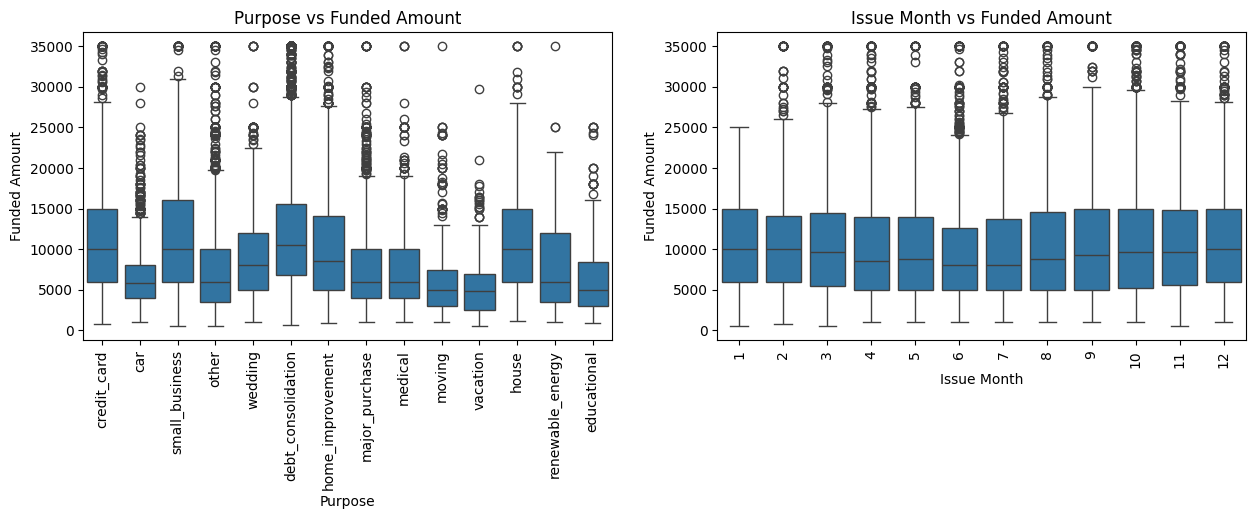

In [91]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="purpose", y="funded_amnt", data=loan)
plt.title("Purpose vs Funded Amount")
plt.xlabel('Purpose')
plt.ylabel('Funded Amount')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x="issue_mon", y="funded_amnt", data=loan)
plt.title("Issue Month vs Funded Amount")
plt.xlabel('Issue Month')
plt.ylabel('Funded Amount')
plt.xticks(rotation=90)
plt.show()

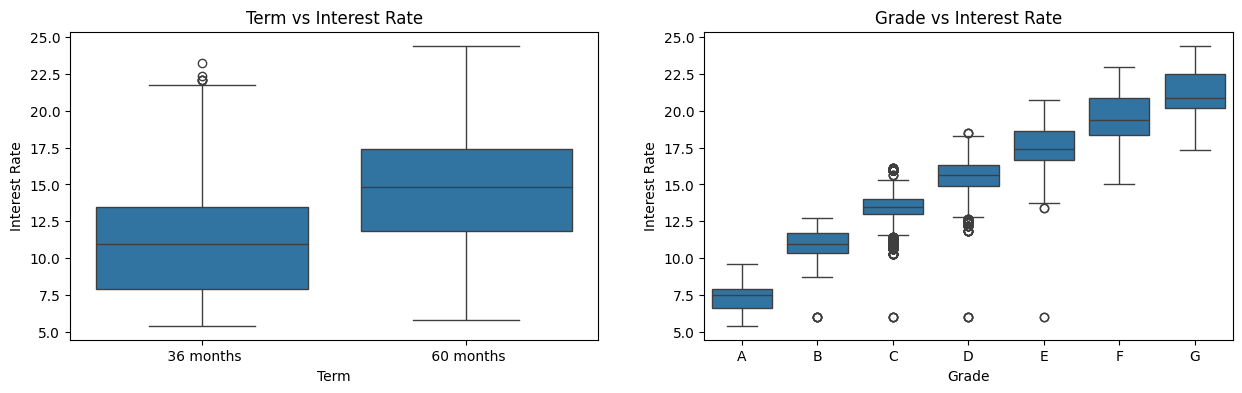

In [92]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=loan)
plt.title("Term vs Interest Rate")
plt.xlabel('Term')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
sns.boxplot(x="grade", y="int_rate", data=loan,order=['A','B','C','D','E','F','G'])
plt.title("Grade vs Interest Rate")
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

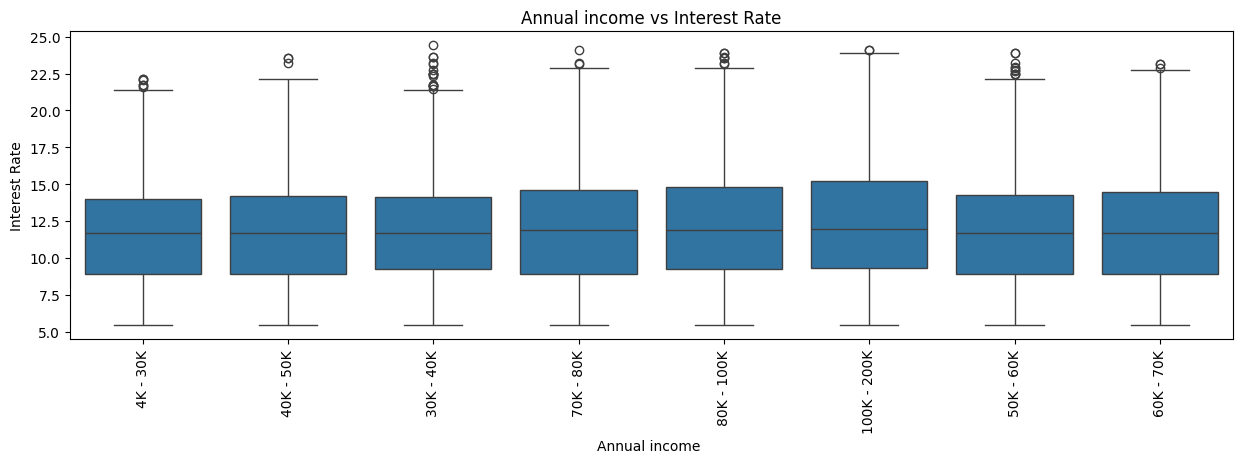

In [93]:
plt.figure(figsize=(15,4))
sns.boxplot(x="annual_inc_bracket", y="int_rate", data=loan)
plt.title("Annual income vs Interest Rate")
plt.xlabel('Annual income ')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.show()

# **MULTIVARIATE ANALYSIS**

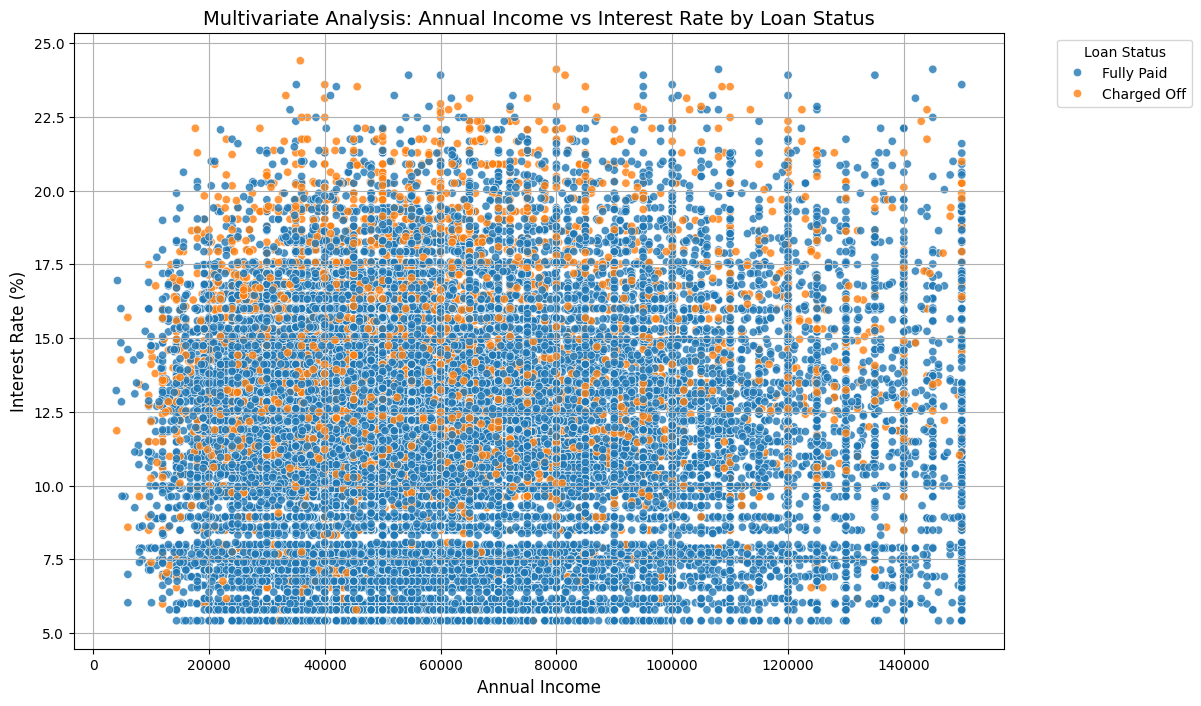

In [94]:
# Create a multivariate scatter plot using hue and size to encode additional variables
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan,
    x='annual_inc',
    y='int_rate',
    hue='loan_status',  # Encode loan status using color
    sizes=(20, 200),  # Scale for point sizes
    alpha=0.8,  # Transparency for better visualization
)

# Customize the chart
plt.title("Multivariate Analysis: Annual Income vs Interest Rate by Loan Status", fontsize=14)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

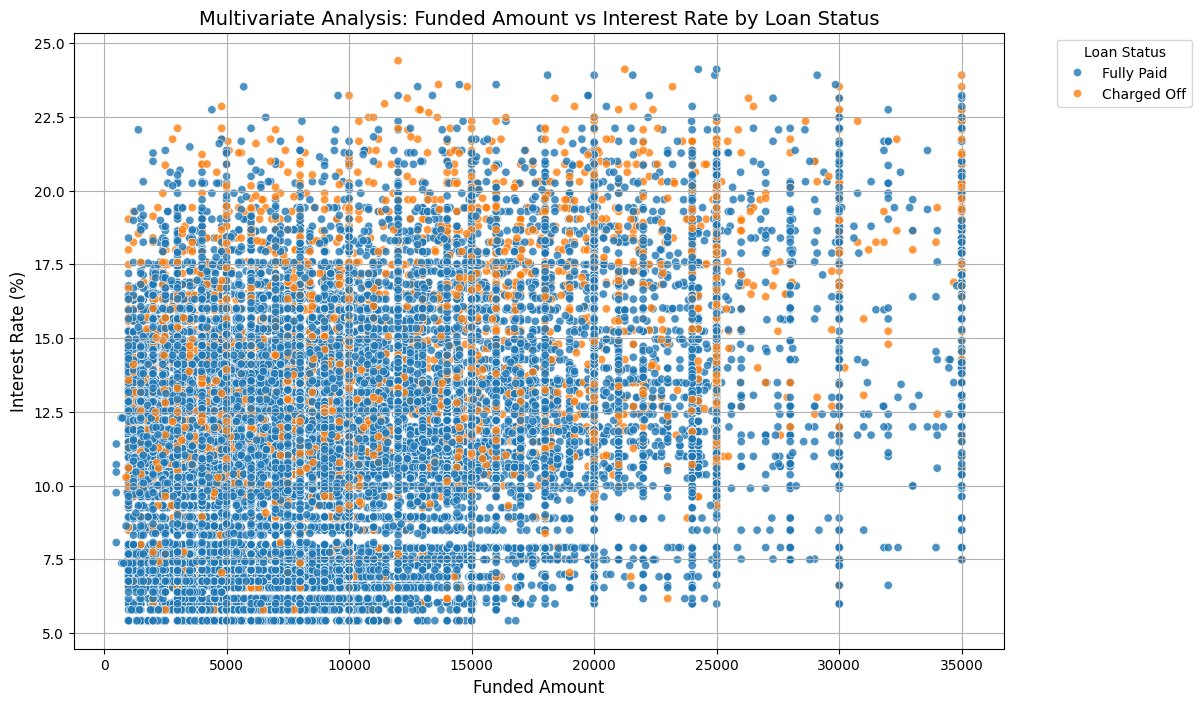

In [95]:
# Create a multivariate scatter plot using hue and size to encode additional variables
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan,
    x='funded_amnt',
    y='int_rate',
    hue='loan_status',  # Encode loan status using color
    sizes=(20, 200),  # Scale for point sizes
    alpha=0.8,  # Transparency for better visualization
)

# Customize the chart
plt.title("Multivariate Analysis: Funded Amount vs Interest Rate by Loan Status", fontsize=14)
plt.xlabel("Funded Amount", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

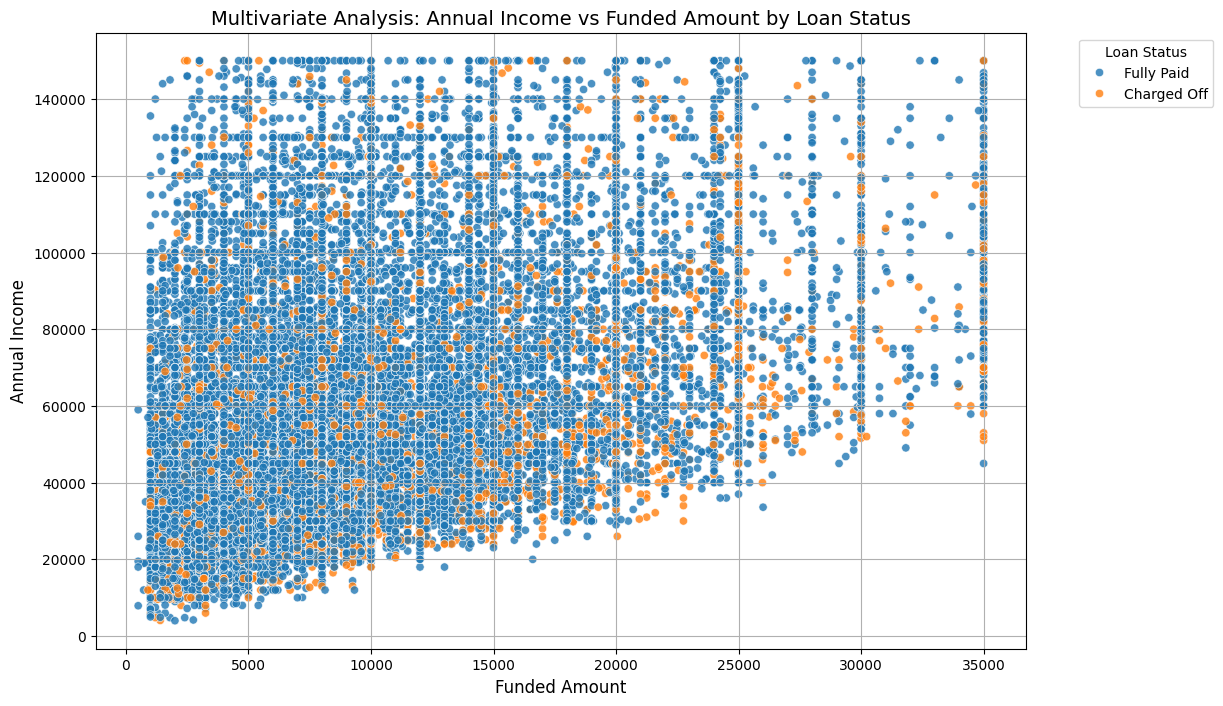

In [96]:
# Create a multivariate scatter plot using hue and size to encode additional variables
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan,
    x='funded_amnt',
    y='annual_inc',
    hue='loan_status',  # Encode loan status using color
    sizes=(20, 200),  # Scale for point sizes
    alpha=0.8,  # Transparency for better visualization
)

# Customize the chart
plt.title("Multivariate Analysis: Annual Income vs Funded Amount by Loan Status", fontsize=14)
plt.xlabel("Funded Amount", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

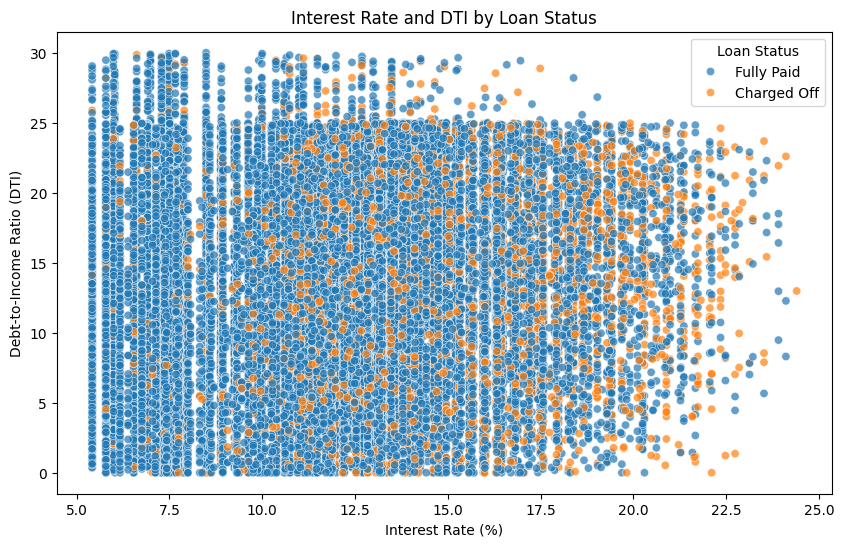

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=loan,
    x='int_rate',
    y='dti',
    hue='loan_status',
    alpha=0.7
)
plt.title('Interest Rate and DTI by Loan Status')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.legend(title='Loan Status')
plt.show()

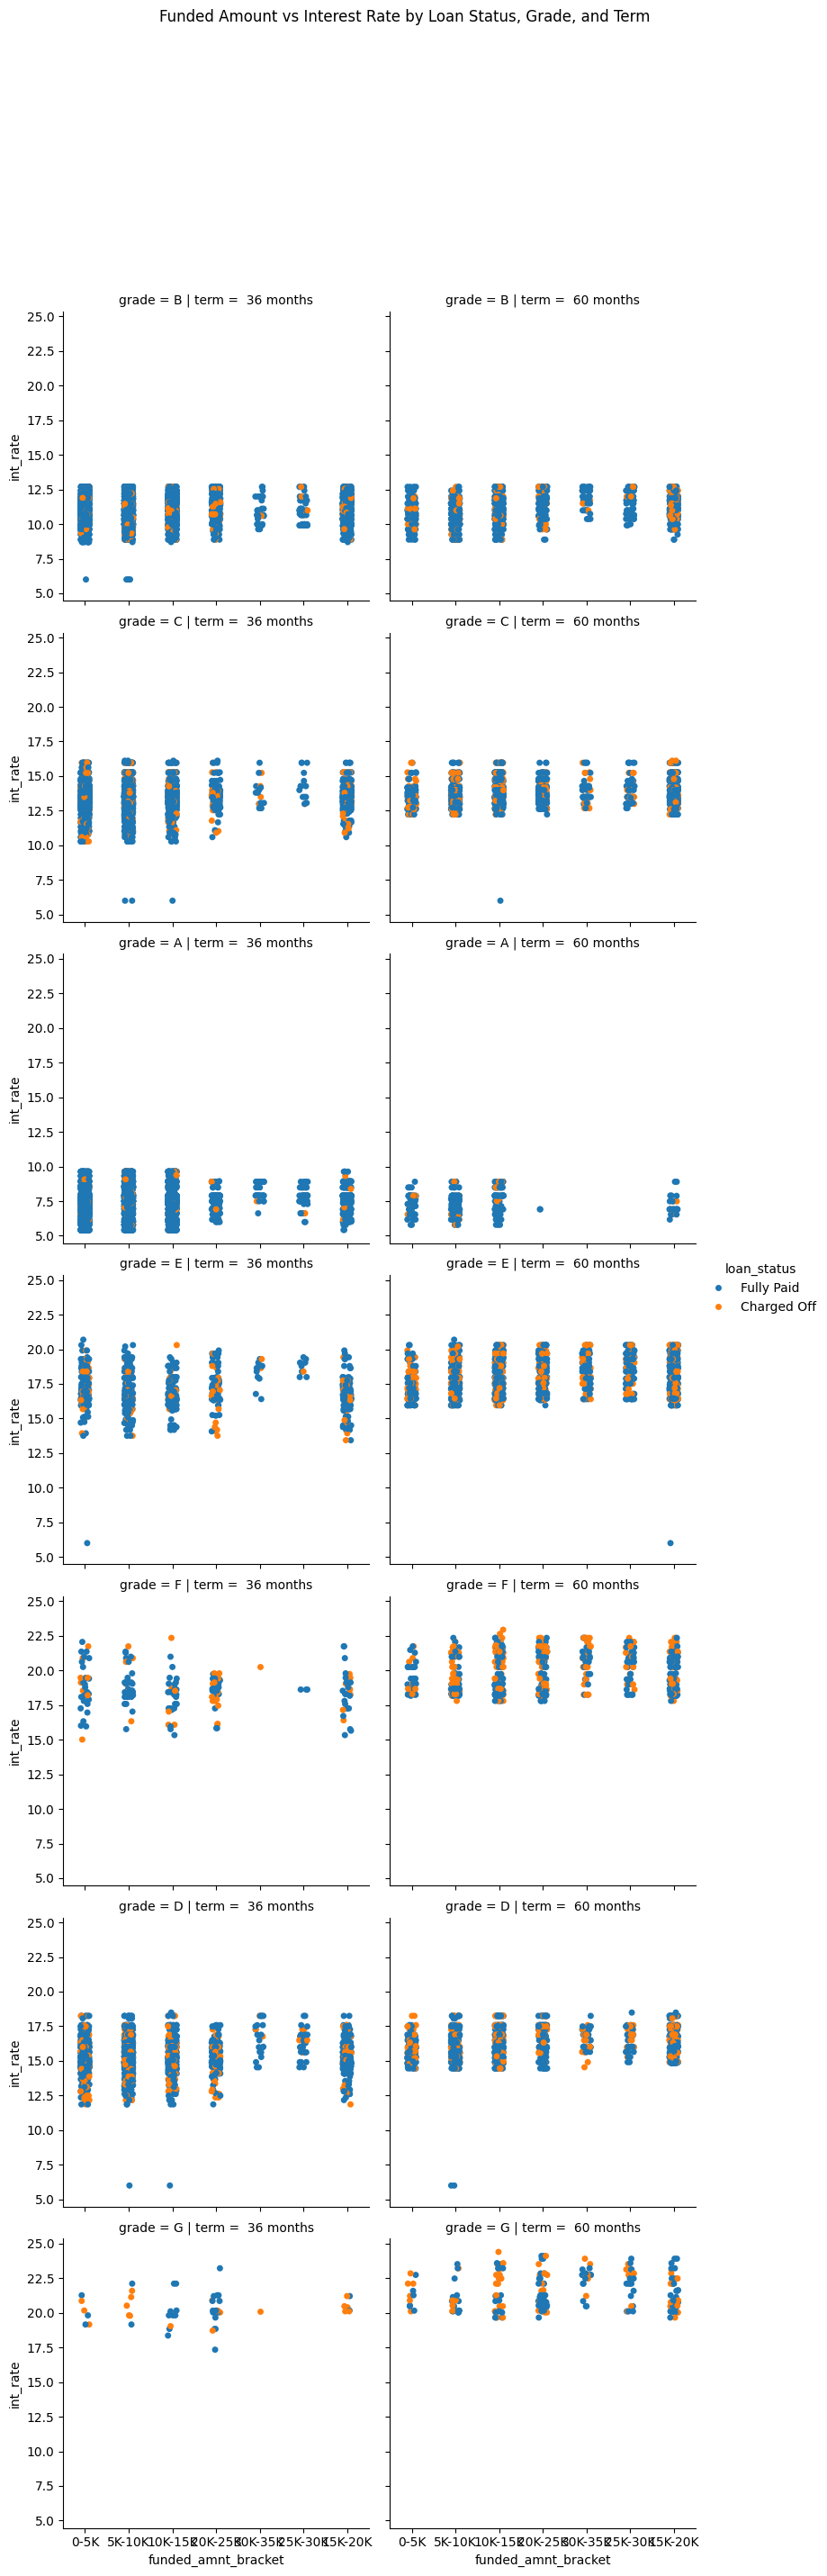

In [98]:
sns.catplot(
    data=loan,
    x='funded_amnt_bracket',
    y='int_rate',
    hue='loan_status',
    col='term',
    row='grade',
    kind='strip',
    height=4,
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Funded Amount vs Interest Rate by Loan Status, Grade, and Term', y=1.02)
plt.show()

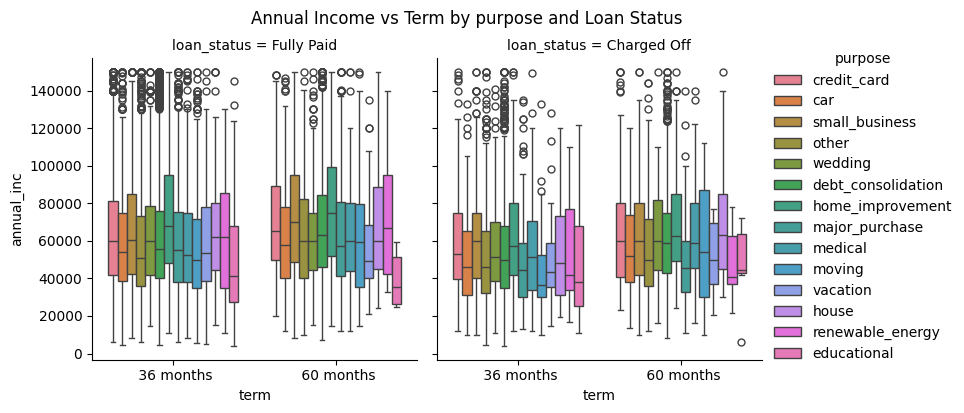

In [100]:
sns.catplot(
    data=loan,
    x='term',
    y='annual_inc',
    hue='purpose',
    col='loan_status',
    kind='box',
    height=4,
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Annual Income vs Term by purpose and Loan Status', y=1.02)
plt.show()

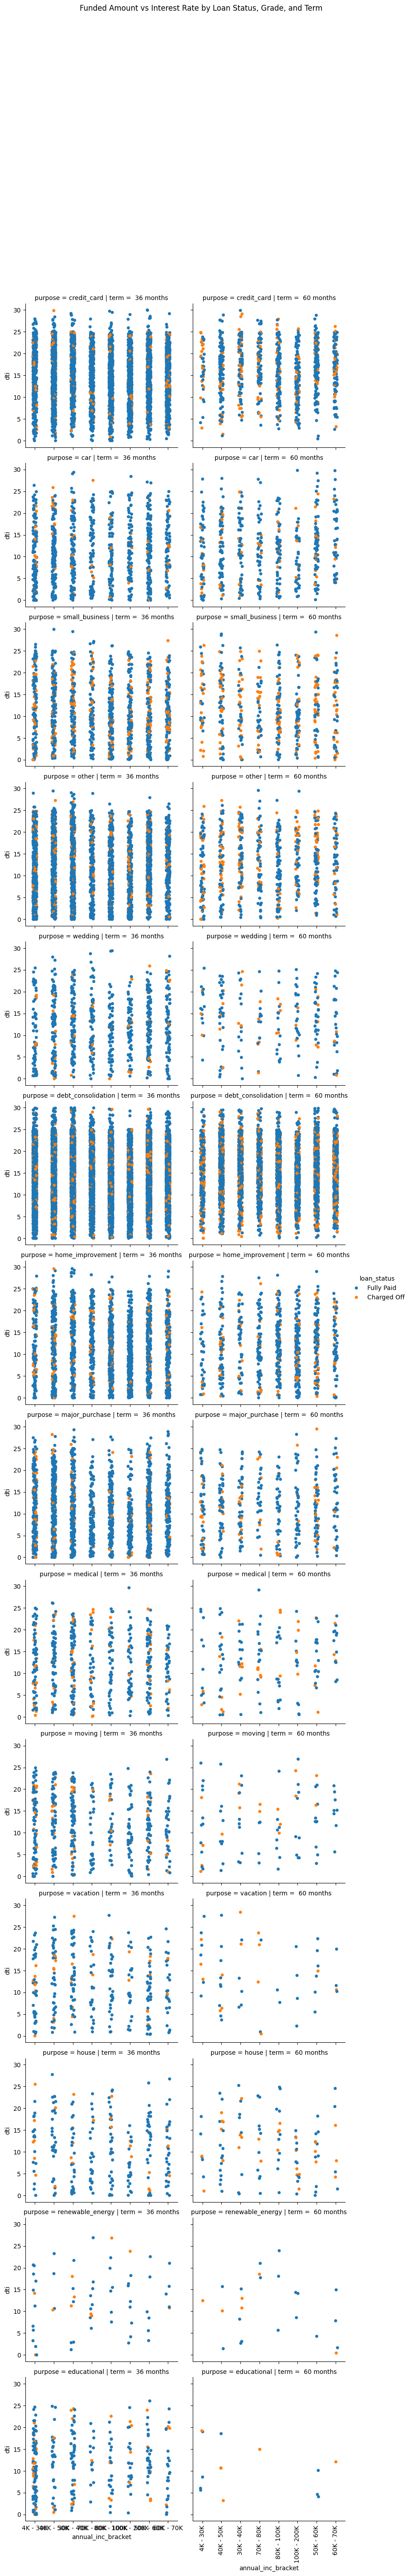

In [101]:
sns.catplot(
    data=loan,
    x='annual_inc_bracket',
    y='dti',
    hue='loan_status',
    col='term',
    row='purpose',
    kind='strip',
    height=4,
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Funded Amount vs Interest Rate by Loan Status, Grade, and Term', y=1.02)
plt.xticks(rotation=90)
plt.show()

#Heat Map

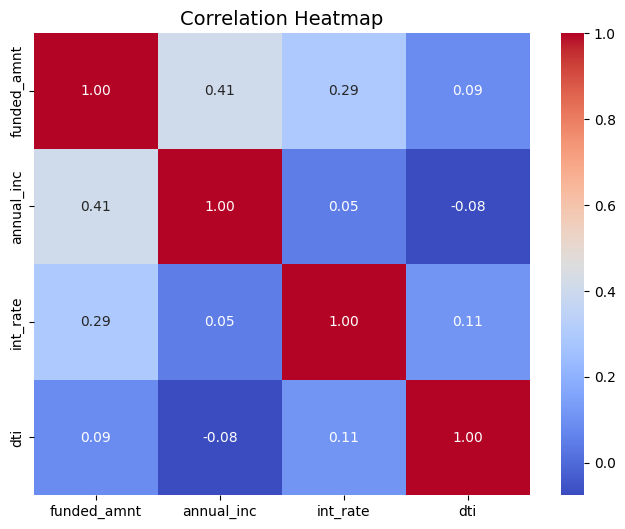

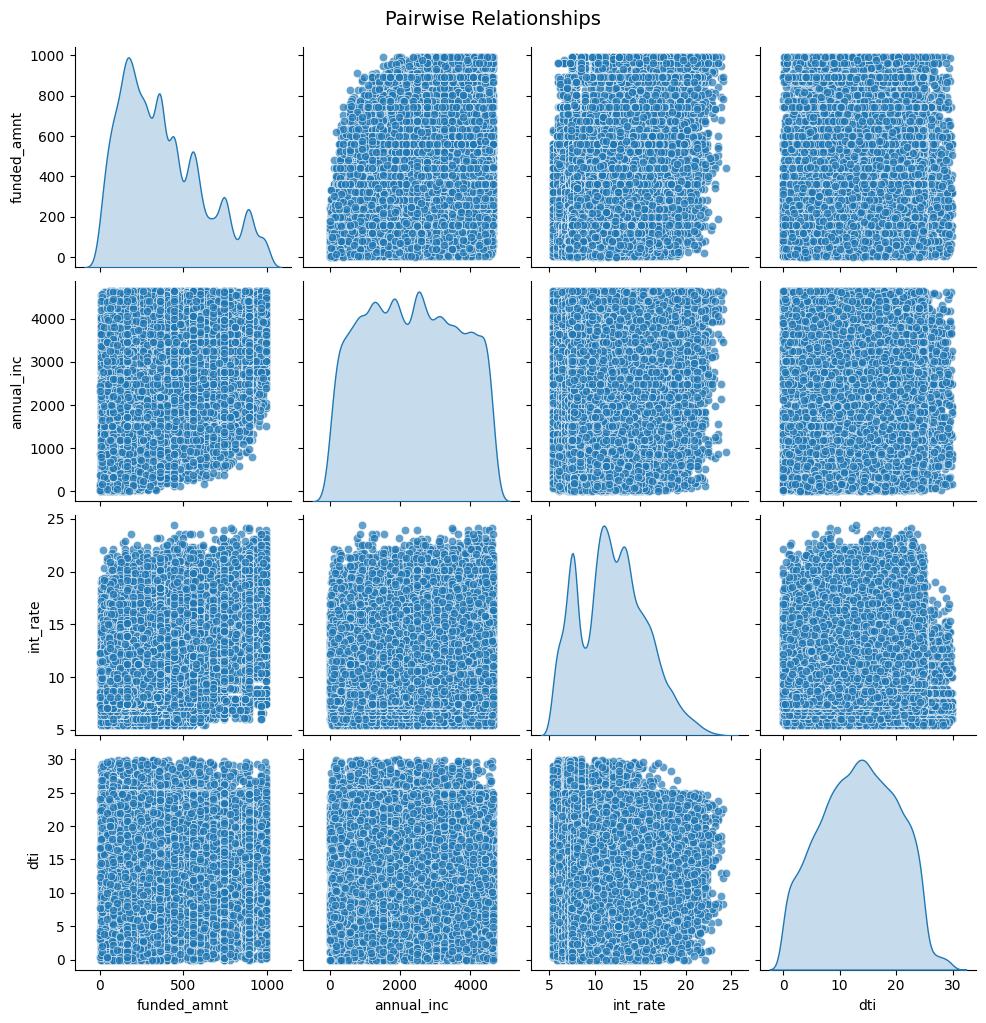

In [102]:
# Annual Income, Funded Amount
loan['annual_inc'] = loan['annual_inc'].astype('category').cat.codes
loan['funded_amnt'] = loan['funded_amnt'].astype('category').cat.codes

# Select relevant columns for correlation analysis
correlation_columns = ['funded_amnt', 'annual_inc', 'int_rate', 'dti']
correlation_data = loan[correlation_columns]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# 1. Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# 2. Pairplot for pairwise relationships
sns.pairplot(correlation_data, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=14)
plt.show()